<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/16%EC%9E%A5%20CNN%20%EC%9D%B5%ED%9E%88%EA%B8%B0%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 16 장 CNN 익히기 2

먼저 딥러닝 기본 프레임을 다 만들었고 지금까지 배웠던 학습 과정과 콜백함수들을 모두 사용하였다.

이번에는 더 깊은 딥러닝, 몇 가지 은닉층을 더하여 성능을 높여볼 것이다.

## CNN

기본 딥러닝 프레임에 이미지 인식 분야에서 강력한 성능을을 보이는 컨볼루션 신경망 (Convolutional Neural Network, CNN)을 얹어볼 것이다.

CNN은 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 마스크를 도입하는 기법이다.

합성곱 Convolution을 이해하기 위한 이미지로 다음이 있다.
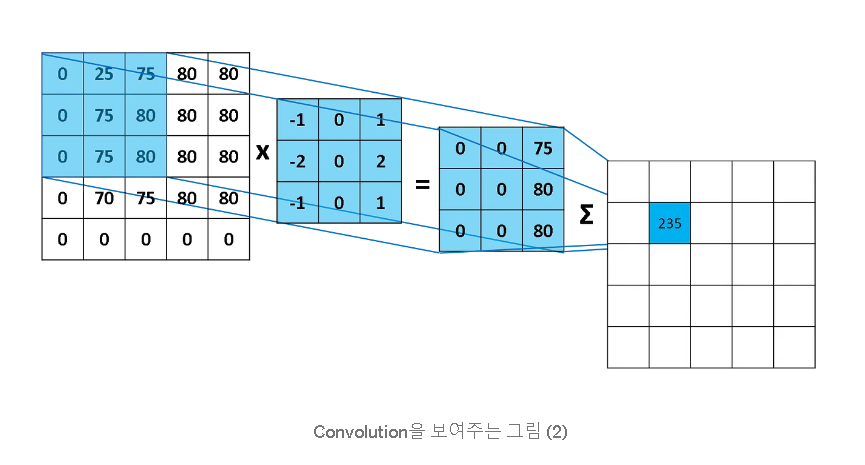

위 사진의 출처는 다음과 같고.('https://conanmoon.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99-%EC%9C%A0%EB%A7%9D%EC%A3%BC%EC%9D%98-%EB%A7%A4%EC%9D%BC-%EA%B8%80%EC%93%B0%EA%B8%B0-66%EC%9D%BC%EC%B0%A8-7011fb7bd400') 

padding 에 대한 설명 또한 있다.

합성곱을 진행할 때, 각 모서리의 데이터들은 한 번 밖에 연산이 되지 못해서, 이 부분의 성질이 학습에 상대적으로 적은 영향을 미칠 수 있다.

따라서 입력 데이터의 매트릭스를 감싸는 0으로 채워진 테두리를 하나 만들어주게 되면, 출력값의 매트릭스의 크기가 유지되면서 모든 위치의 데이터를 학습할 수 있다.

## Convolution

이러한 합성곱을 통해 입력 데이터로부터 더욱 정교한 특징을 추출할 수 있다. 

케라스에서 컨볼루션 층을 추가하는 함수는 Conv2D() 이다.

```
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1),
                  activaiton = 'relu'))
```
첫 번째 인자 : 사용할 마스크의 개수

두 번째 인자 : 마스크(커널)의 크기

세 번째 인자 : Dense 층과 마찬가지로 맨 처음 층에는 입력되는 값을 알려주어야 한다. input_shape=(행, 열, 색상 또는 흑백)

네 번째 인자 : 활성화함수

```
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
```
하나의 층을 더 추가해서 지금까지의 과정을 살펴보면,

28X28 의 이미지를 **(3, 3) 사이즈인 32개의 각기 다른 커널을**을 돌려 32개의 컨볼루션 층을 만들어낸다.

그 다음 층에서는 다시 **(3, 3) 사이즈인 64개의 각기 다른 커널을** 만든 후, 앞서 만든 **32개의 컨볼루션에 각각의 커널을 돌려** 총 **64개의 컨볼루션을** 다시 만들어낸다.

##MaxPooiling

앞서 구현한 컨볼루션 층을 통해 이미지의 새로운 특징들을 도출해냈다.

하지만 그 결과가 여전히 크고 복잡하면 이를 다시 한 번 축소해야 한다.</br>이 과정을 풀링(pooling) 또는 서브 샘플링(sub_sampling)이라고 한다.

풀링 기법 중에서도 가장 많이 사용되는 방법이 맥스 풀링(max pooling)이다.

이는 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 버리는 것이다.

```
model.add(MaxPooling2D(pool_size=2))
```
맥스풀링 층을 하나 추가하며 풀링 창의 크기를 2로 정하면 전체 크기가 절반으로 줄어들게 된다.



## Drop out, Flatten

노드의 수가 많아지거나 층이 많아진다고 학습이 무조건 좋아지는 것이 아님을 과적합을 통해 배웠다. 

학습에서 가장 중요한 것은 과적합을 얼마나 효과적으로 피해가는지에 달려있다고 해도 과언이 아니다.

그러한 과정을 도와주는 기법 중 간단하지만 효과적인 기법이 바로 **드롭아웃(Drop out) 기법**이다.

이는 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것이다.

랜덤하게 노드를 끔으로써 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있다.
```
model.add(Dropout(0.25))
```

이제 이러한 과정을 지나 다시 앞에서 생성한 Dense() 함수를 이용해 만들었던 기본 층에 연결하기 위해선 **Flatten()**함수가 필요하다.

컨볼루션과 맥스 풀링에서는 이미 2차원 배열인 채로 다루었기 때문에, 이를 1차원으로 바꿔주는 함수가 Flatten() 함수이다.

```
model.add(Flatten())
```


In [68]:
#수정된 전체 코드

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

#seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#데이터 로드드
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

#모델 프레임 설정정
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), 
                  activation='relu'))
model3.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Dropout(0.25))
model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))    

#모델 실행 환경 설정
model3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#모델 최적화 설정
MODEL_DIR = './model3/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only = True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

history = model3.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 30,
                    batch_size = 200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model3.evaluate(X_test, Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.05770, saving model to ./model3/01-0.0577.hdf5


KeyboardInterrupt: ignored

In [ ]:
model = keras.models.load_model('/content/model/15-0.0590.hdf5')
model2 = keras.models.load_model('/content/model2/14-0.0606.hdf5')

print((model.evaluate(X_test, Y_test)))
print((model2.evaluate(X_test, Y_test)))
print((model3.evaluate(X_test, Y_test)))

#테스트셋 오차
y_vloss = history.history['val_loss']

#학습셋 오차
y_loss = history.history['loss']

#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red',
         label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue',
         label = 'Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

실행은 내일...